# Introduction to Clustering
A Summary of lecture "Cluster Analysis in Python", via [datacamp](https://learn.datacamp.com/courses/cluster-analysis-in-python?embedded=true#!)

This notebook is a basic summary of some of the different examples from the lectures

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Unsupervised learning: basics
- What is unsupervised learning?
    - A group of machine learning algorithm that find patterns in data
    - Data for algorithms has not been labeled, classified or characterized
    - The objective of the algorithm is to interpret any structure in the data
    - Common unsupervised learning algorithms : Clustering, neural network, anomaly detection
- What is clustering?
    - The process of grouping items with similar characteristics
    - Items in groups similar to each other than in other groups
    - Example: distance between points on a 2D plane

### Pokémon sightings
There have been reports of sightings of rare, legendary Pokémon. You have been asked to investigate! Plot the coordinates of sightings to find out where the Pokémon might be.

In [2]:
# Create x,y coordinate arrays
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

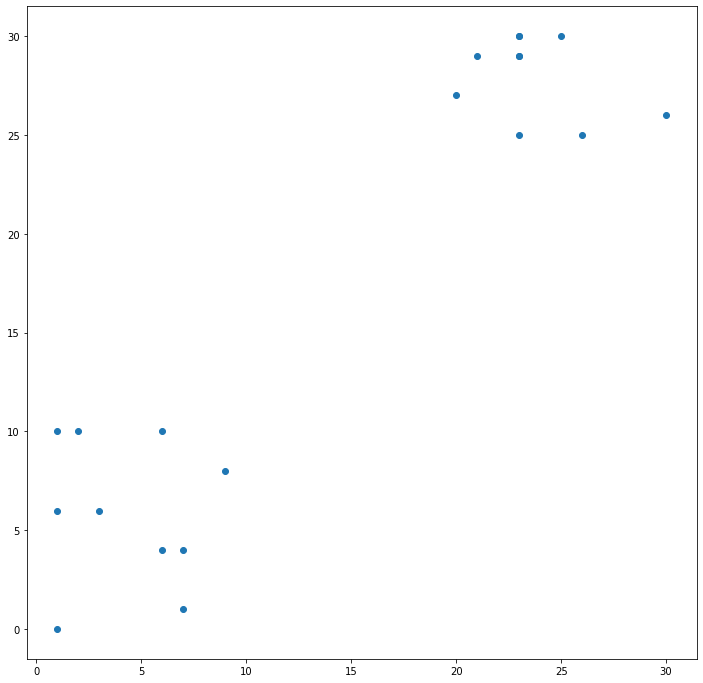

In [3]:
# Create a scatter plot
fig, ax = plt.subplots(figsize=(12,12))
plt.scatter(x, y)

## Basics of cluster analysis
- What is a cluster?
    - A group of items with similar characteristics
    - Google News: articles where similar words and word associations appear together
    - Customer Segments
- Clustering Algorithms
    - Hierarchical Clustering
    - K-means Clustering
    - Other clustering algorithms: DBSCAN, Gaussian Methods

### Pokémon sightings: hierarchical clustering
We are going to continue the investigation into the sightings of legendary Pokémon from the previous exercise. Remember that in the scatter plot of the previous exercise, you identified two areas where Pokémon sightings were dense. This means that the points seem to separate into two clusters. In this exercise, you will form two clusters of the sightings using hierarchical clustering.

In [4]:
# Create a dataframe using the x and y arrays above
df = pd.DataFrame({'x': x, 'y': y})

In [5]:
# Import dependencies
from scipy.cluster.hierarchy import linkage, fcluster

<AxesSubplot:xlabel='x', ylabel='y'>

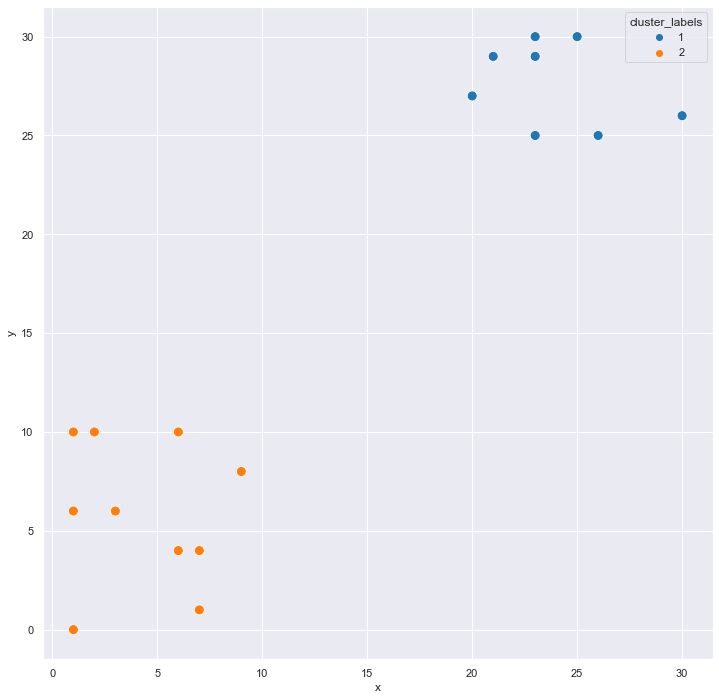

In [6]:
# Use the linkage() to compute distance
Z = linkage(df, 'ward')

# Generate cluster labels
df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')

# Set seaborn theme and figure size
sns.set_theme()
fig, ax = plt.subplots(figsize=(12,12))

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df, s=100, palette='tab10')

### Pokémon sightings: k-means clustering
We are going to continue the investigation into the sightings of legendary Pokémon from the previous exercise. Just like the previous exercise, we will use the same example of Pokémon sightings. In this exercise, you will form clusters of the sightings using k-means clustering.

In [7]:
# Import dependencies
from scipy.cluster.vq import kmeans, vq

In [8]:
# Cast the dataframe as floats 
df = df.astype('float')

# Compute cluster centers
centroids, _ = kmeans(df, 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)

<AxesSubplot:xlabel='x', ylabel='y'>

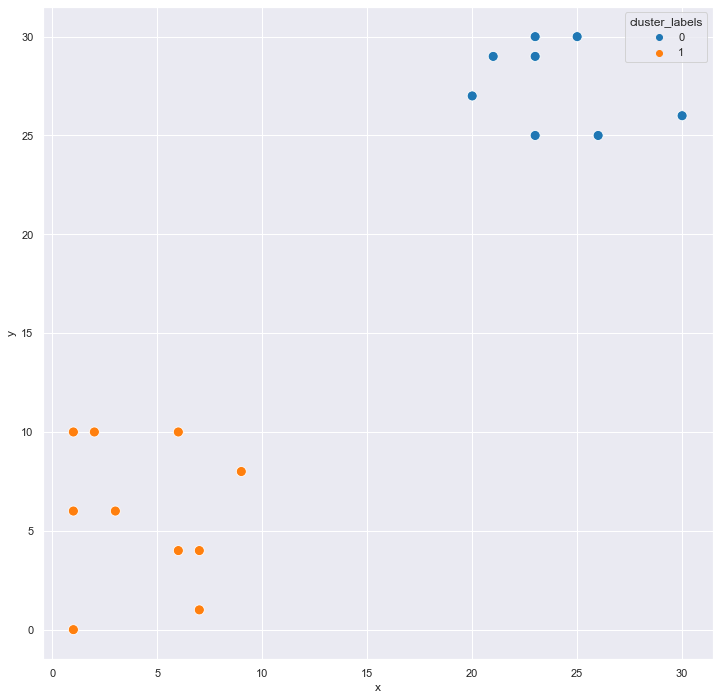

In [9]:
# Plot the points with seaborn
fig, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df, s=100,  palette='tab10')